# Семинар 10.

# Линейное программирование. Симплекс-метод

## Текущее место в программе

- Безусловная оптимизация
    - ~~Одномерная минимизация~~
    - ~~Градиентный спуск~~
    - ~~Метод Ньютона и квазиньютоновские методы~~
    - ~~Метод сопряжённых градиентов~~
- Условная оптимизация
    - <span style="color:red">Линейное программирование: симплекс-метод</span>
    - Линейное программирование: прямой барьерный метод
    - Методы проекции градиента и условного градиента
    - Методы штрафов и барьеров
    - Метод модифицированной функции Лагранжа
    - Последовательное квадратичное программирование
- Разные темы
    - ~~Задача наименьших квадратов~~
    - Проксимальные методы
    - Оптимальные методы и нижние оценки
    - Зеркальный спуск
    - Обзор стохастических методов

## Постановка задачи
Даны векторы $c \in \mathbb{R}^n$, $b \in \mathbb{R}^m$ и матрица $A \in \mathbb{R}^{m \times n}$ такая что $m < n$ и $\mathrm{rank}(A) = m$ 
- Стандартная форма
\begin{align*}
&\min_x c^{\top}x \\
\text{s.t. } & Ax \leq b\\
& x_i \geq 0, \; i = 1,\dots, n
\end{align*}
- Каноническая форма (везде далее рассматривается именно она)
\begin{align*}
&\min_x c^{\top}x \\
\text{s.t. } & Ax = b\\
& x_i \geq 0, \; i = 1,\dots, n
\end{align*}

### Преобразование постановок

- $Ax = b \equiv 
\begin{cases}
Ax \leq b\\
Ax \geq b
\end{cases}
$
- $Ax \leq b \equiv 
\begin{cases}
Ax + z =  b\\
z \geq 0
\end{cases}$ 
- свободная переменная $x \equiv 
\begin{cases}
x = u - v\\
u \geq 0, \; v \geq 0
\end{cases}$
- смена знака достигается умножением на $-1$

## Приложения

- Производство оптимального количества товара при ресурсных ограничениях:
\begin{align*}
&\max_x c^{\top}x \\
\text{s.t. } & Ax \leq b\\
& x_i \geq 0, \; i = 1,\dots, n,
\end{align*}
где $x_i$ - количество $i$-го товара, $c_i$ - прибыль от производства $i$-го товара, $b_i$ - доступное количество $i$-го материала, $a_{ij}$ - количество $i$-го материала, который требуется для производства единицы $j$-го товара.

- Потоки в сетях: транспортная задача, задача о максимальном потоке, выбор пути в коммуникационной сети для передачи сообщения с минимальной стоимостью

- Задача регрессии в нормах $\ell_1$ и $\ell_{\infty}$ может быть сведена к задаче линейного программирования

## Какой ответ может дать алгоритм?

- Задача разрешима и точка минимума $x^*$
- Задача неограничена и минимальное значение равно $-\infty$
- Задача неразрешима, то есть допустимое множество пусто

## Предварительные соображения

- Задача линейного программирования - это поиск минимума линейной функции на многомерном многоугольнике

**Вопросы:**

- при каких условиях есть решение?
- среди каких точек искать решение?
- как именно искать решение?

## Определения

1. Tочка из допустимого множества называется *вершиной многоугольника*, если она не лежит на отрезке между двумя другими точками многоугольника.
2. Точка $x$ называется *угловой точкой* многоугольника, если
    - она лежит в множестве
    - существует такое множество $\mathcal{B} \subset \{1, \dots, n \}$, что 
        - $|\mathcal{B}| = m$
        - $i \notin \mathcal{B} \Rightarrow x_i = 0$
        - матрица $B = [a_i]_{i \in \mathcal{B}}$ невырождена, где $a_i$ - $i$-ый столбец матрицы $A$. Матрица $B$ называется *матрицей базиса*

**Теорема** Все угловые точки являются вершинами соответствующего многоугольника.

## Фундаментальная теорема линейного программирования

1. Если в задаче линейного програмирования допустимое множество непусто, тогда оно имеет как минимум одну угловую точку.
2. Если задача линейного программирования имеет решения, тогда хотя бы одно из них является угловой точкой.
3. Если задача линейного программирования ограничена и допустимое множество непусто, тогда она имеет оптимальное решение.

## Симплекс-метод

- Симплекс-метод [предложил](https://www.rand.org/pubs/reports/R366.html) Дж. Данциг в 1947.
- Его появление совпало с развитием компьютеров и явилось одним из первых доказательств их полезности
- Имел большой успех в связи с многочисленными приложениями в экономике и планировании производства
- Включён в [список](http://www.uta.edu/faculty/rcli/TopTen/topten.pdf) лучших алгоритмов XX века по версии редакторов SIAM

### Общая схема

1. Находим произвольную угловую точку допустимого множества
2. Переходим в сопряжённую ей угловую точку так, чтобы целевая функция уменьшалась
3. Если можно продолжить уменьшение значения целевой функции, переходим в следующую угловую точку

**Вопрос:** как формализовать и выполнить эти шаги?

## Псевдокод итерации симплекс-метода

Дана угловая точка $x$, соответствующая ей матрица базиса $B$ и множество индексов $\mathcal{B}$.

1. Вычислить *оценки замещения* (reduced costs) $\overline{c}_j = c_j - c^{\top}_{\mathcal{B}}B^{-1}a_j$ для всех $j \not\in \mathcal{B}$.
    - если $\overline{c}_j \geq 0$ для всех $j$, то текущее значение является оптимальным и уменьшить целевую функцию нельзя
    - иначе <span style="color:red"> выбрать </span> индекс $j^*$, для которого $\overline{c}_{j^*} < 0$
2. Вычислить $u = B^{-1}a_{j^*}$
    - если все компоненты $u$ неположительны, то задача неограничена, оптимальное значение равно $-\infty$
    - если есть положительные компоненты, то 
    $$
    \theta^* = \min_{\{i | u_i > 0\}} \frac{x_{\mathcal{B}(i)}}{u_i}
    $$
3. Пусть $\ell$ <span style="color:red"> такой </span> индекс, что 
    $$
    \theta^* = \frac{x_{\mathcal{B}(\ell)}}{u_{\ell}}.
    $$
    Формируем новую матрицу базиса $\hat{B}$ с помощью замены столбца $a_{\mathcal{B}(\ell)}$ на столбец $a_{j^*}$. Новая угловая точка $\hat{x}$, соответствующая матрице базиса $\hat{B}$, определяется так
    $$
    \begin{align*}
    & \hat{x}_{j^*} = \theta^*\\
    & \hat{x}_{\mathcal{B}(k)} = x_{\mathcal{B}(k)} - \theta^*u_k, \text{если } k \neq \ell
    \end{align*}
    $$

## Существующие реализации симплекс-метода

- Наивная реализация
- Модифицированная реализация
- <span style="color:red"> Табличная реализация </span>

## Почему есть различные реализации и чем они отличаются?

- Самая сложная операция на каждой итерации - это вычисление $B^{-1}A$
- Матрицы $B$ на итерации $i$ и $i+1$ отличаются одним столбцом
- Как проводить вычисление $B^{-1}A$?

### Наивная реализация

- На каждой итерации решать систему $By = A$ и вычислять оценки замещения с помощью вектора $c^{\top}_{\mathcal{B}}y$
- Сложность - $O(m^3 + mn)$
- Информации с предыдущей итерации не используется
- Если систему $By = A$ можно решить быстро, сложность существенно уменьшается. Это зависит от структуры исходной матрицы $A$

### Модифицированный (revised) симплекс-метод 

- Обновление $B$ можно проводить с помощью прибавления к ней матрицы $U = (a_q - a_p)e^{\top}_p$, где $e_p$ - единичный вектор с 1 на позиции $p$, $a_j$ - столбец $j$ матрицы $A$
- Столбец $a_p$ заменяется на столбец $a_q$
- Матрица $U$ имеет ранг 1
    - $(B + U)^{-1}$ с помощью [формулы Шермана-Морисона-Вудбери](https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula) может быть вычислена за $O(m^2)$
    - Обновление факторов $L$ и $U$ в LU разложении матрицы $B$ - это более рациональный способ, однако получение формул пересчёта менее тривиально
    
- Итоговая сложность $O(m^2)$ в лучшем случае, если оценки замещения вычисляются с выбором ведущего элемента, и $O(mn)$ в худшем случае, если необходимо вычислить все оценки замещения.

Больше деталей см. [тут](http://www.maths.ed.ac.uk/hall/RealSimplex/25_01_07_talk1.pdf) и [тут](http://www.maths.ed.ac.uk/hall/RealSimplex/25_01_07_talk2.pdf)

### Табличная реализация

- Подробно примеры и описание ниже
- Сложность равна размеру таблицы - $O(mn)$
- Возможны проблемы с устойчивостью при проведении элементарных преобразований

## Теорема корректности

Пусть допустимое множество непусто и каждая угловая 

точка *невырождена*. 

Тогда симплекс-метод останавливается за конечное число итераций:
- либо найдена оптимальная угловая точка $x^*$
- либо показано, что оптимальное значение равно $-\infty$

**Определение.** Угловая точка называется *вырожденной*, если она содержит больше $n - m$ нулевых компонент.

**Вопрос:** что геометрически означает вырожденность?

## Проблема вырожденности угловой точки

Если одна из угловых точек является *вырожденной*, то это может привести к **зацикливанию** симплекс-метода!



### Решение

- Лексикографический порядок выбора $\ell$
- Правило Бланда - выбор наименьшего $j^*$ и $\ell$

[Р. Бланд](https://people.orie.cornell.edu/bland/) - американский математик, 

один из создателей теории [ориентированных матроидов](https://en.wikipedia.org/wiki/Oriented_matroid).

## Как искать начальную угловую точку?

- Двухфазный симплекс-метод
- M-метод

### Двухфазный симплекс метод

Для поиска начальной угловой точки составим следующую вспомогательную задачу при условии, что $b_i \geq 0, \; i =1, \dots,m$. Этого легко добиться умножение строк матрицы $A$ и соответствующих элементов $b$ на $-1$.
\begin{align*}
& \min_{z, y} y_1 + \ldots + y_m \\
\text{s.t. } & Az + y = b\\
& z \geq 0, \; y \geq 0
\end{align*}

- Начальная точка для этой задачи очевидна $z = 0, \; y = b$
- Если оптимальное значение функции в этой задаче **не равно** $0$, то допустимое множество исходной задачи пусто
- Если оптимальное значение функции в этой задаче **равно** $0$, то $y^* = 0$ и $x_0 = z^*$.

#### Какая начальная матрица базиса?

**Проблема:** в базисе, соответствующем $x_0$, может оказаться вспомогательная переменная равная 0.

**Решение:** процедура вывода вспомогательной переменной из базиса

#### Вывод вспомогательной переменной из базиса

1. Выбираем вспомогательную переменную $x_k = 0$, но входящую в базис, найденный при решении вспомогательной задачи.
2. Смотрим на строчку в таблице, которая соответствует $x_k$
    - если в этой строке все элементы для столбцов, соответствующих изначальным переменным равны 0, то эту строку можно исключить, так как она является линейно зависимой от остальных строк в матрице
    - если найдётся ненулевой элемент в этой строке и в столбце, соответствующем изначальной переменной, то выбираем этот элемент ведущим и вводим в базис соответствующую этому столбцу переменную. Разница с обычным шагом симплекс-метода в том, что этот элемент может быть отрицательным.

## Итого
- Первая фаза - поиск начальной угловой точки, вторая фаза - решение исходной задачи с использованием решения и базиса от первой фазы.
- Так как значение переменной останется равно 0, процедра вывода вспомогательной переменной не повляет на значение целевой функции
- Базис, полученный после решения вспомогательной задачи и исключения вспомогательных переменных, следует использовать на первой итерации симплекс-метода при решении исходной задачи

### М-метод

**Идея:** объединить двухфазный симплекс-метод в однофазный

\begin{align*}
& \min_{z, y} c^{\top}z + M(y_1 + \ldots + y_m) \\
\text{s.t. } & Az + y = b\\
& z \geq 0, \; y \geq 0
\end{align*}

$M$ - произвольное большое положительное число, можно оставить как параметр и при необходимости сделать достаточно большим

### Примеры решения задач табличным симплекс-методом

Примеры приведены [здесь](./examples.pdf)

## Пример использования

In [1]:
import scipy.optimize as scopt
import numpy as np
n = 1000
m = 10
c = 10 * np.random.rand(n)
b = np.random.rand(m)
A = np.random.randn(m, n)
res = scopt.linprog(c, A, b, bounds=[(-1, None) for i in range(n)])
print(res)

     fun: -5038.625367833683
 message: 'Optimization terminated successfully.'
     nit: 39
   slack: array([110.76425211,  20.14326871,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ])
  status: 0
 success: True
       x: array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.  

## Сложность

- Было показано, что в худшем случае время работы симплекс-метода <span style="color:red;font-weight:bold"> экспоненциально</span> зависит от размерности задачи!
- Однако на практике сложность чаще всего пропорциональна количеству ограничений и симплекс-метод сходится быстро
- Почему это так, неясно до сих пор

### Пример Klee, Minty (1972) [[1]](https://en.wikipedia.org/wiki/Klee–Minty_cube)

В задаче
\begin{align*}
& \max_{x \in \mathbb{R}^n} 2^{n-1}x_1 + 2^{n-2}x_2 + \dots + 2x_{n-1} + x_n\\
\text{s.t. } & x_1 \leq 5\\
& 4x_1 + x_2 \leq 25\\
& 8x_1 + 4x_2 + x_3 \leq 125\\
& \ldots\\
& 2^n x_1 + 2^{n-1}x_2 + 2^{n-2}x_3 + \ldots + x_n \leq 5^n\\
& x \geq 0
\end{align*}
начиная с точки $x_0 = 0$ и следуя симплекс-методу, необходимо обойти $2^n - 1$ вершину.

**Упражнение**: решите эту задачу для $n = 2$ и $n = 3$, и обобщите результат, получив решение для произвольного $n$.

In [3]:
def generate_KleeMinty_test_problem(n):
    c = np.array([2**i for i in range(n)])
    c = c[::-1]
    bounds = [(0, None) for i in range(n)]
    b = np.array([5**(i+1) for i in range(n)])
    a = np.array([1] + [2**(i+1) for i in range(1, n)])
    A = np.zeros((n, n))
    for i in range(n):
        A[i:, i] = a[:n-i]
    return -c, A, b, bounds

In [4]:
n = 5
c, A, b, bounds = generate_KleeMinty_test_problem(n)
print(c)
print(A) 
print(b)
print(bounds)

[-16  -8  -4  -2  -1]
[[ 1.  0.  0.  0.  0.]
 [ 4.  1.  0.  0.  0.]
 [ 8.  4.  1.  0.  0.]
 [16.  8.  4.  1.  0.]
 [32. 16.  8.  4.  1.]]
[   5   25  125  625 3125]
[(0, None), (0, None), (0, None), (0, None), (0, None)]


In [5]:
res = scopt.linprog(c, A, b, bounds=bounds)
print(res)

     fun: -3125.0
 message: 'Optimization terminated successfully.'
     nit: 31
   slack: array([  5.,  25., 125., 625.,   0.])
  status: 0
 success: True
       x: array([   0.,    0.,    0.,    0., 3125.])


In [6]:
n_list = range(3, 16)
n_iters = np.zeros(len(n_list))
times = np.zeros(len(n_list))
for i, n in enumerate(n_list):
    c, A, b, bounds = generate_KleeMinty_test_problem(n)
    res = scopt.linprog(c, A, b, bounds=bounds, options={"maxiter": 2**max(n_list)})
    time = %timeit -o scopt.linprog(c, A, b, bounds=bounds, options={"maxiter": 2**max(n_list) + 1})
    n_iters[i] = res.nit
    times[i] = time.best

2.78 ms ± 77.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.86 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.5 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
23.3 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
48.3 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
94.6 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
191 ms ± 3.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
401 ms ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
791 ms ± 21.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.6 s ± 73.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.4 s ± 157 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.79 s ± 82.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
13.3 s ± 204 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


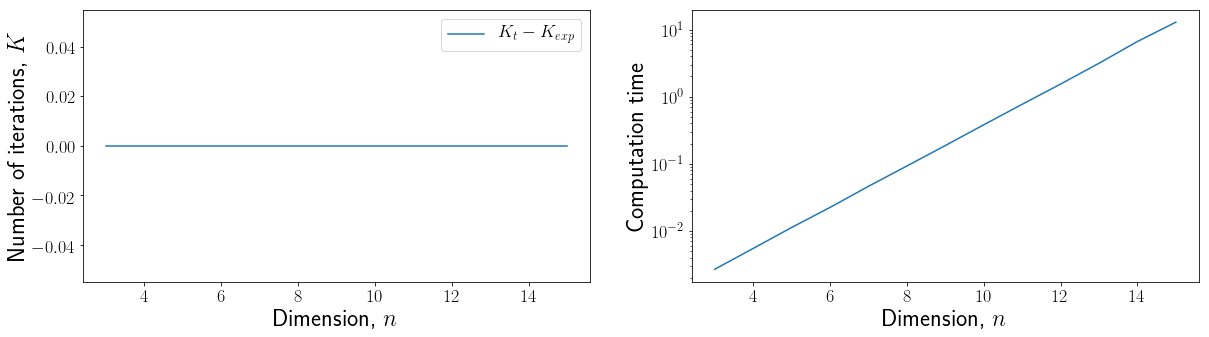

In [7]:
USE_COLAB = False

%matplotlib inline
import matplotlib.pyplot as plt

if not USE_COLAB:
    plt.rc("text", usetex=True)
    
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(n_list, n_iters - np.array([2**n - 1 for n in n_list]), label="$K_t - K_{exp}$")
# plt.semilogy(n_list, [2**n - 1 for n in n_list], label="Theory")
plt.xlabel("Dimension, $n$", fontsize=24)
plt.ylabel("Number of iterations, $K$", fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

plt.subplot(1, 2, 2)
plt.semilogy(n_list, times)
plt.xlabel("Dimension, $n$", fontsize=24)
plt.ylabel("Computation time", fontsize=24)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

## Резюме

- Задача линейного программирования
- Приложения
- Симплекс-метод и его сложность